<a href="https://colab.research.google.com/github/hamzajaved240/Battery-modeling-pybamm/blob/main/3.Change_parameter_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pybamm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 MB 9.7 MB/s eta 0:00:00


In [2]:
import pybamm

In [3]:
model = pybamm.lithium_ion.DFN()

In [4]:
chemistry = pybamm.parameter_sets.Chen2020

<ipython-input-4-656e39f64363>:1: DeprecationWarning: Parameter sets should be called directly by their name (Chen2020), instead of via pybamm.parameter_sets (pybamm.parameter_sets.Chen2020).
  chemistry = pybamm.parameter_sets.Chen2020


In [5]:
# You can pass the chemistry as a string instead of as a keyword argument.
params = pybamm.ParameterValues("Chen2020")

In [6]:
params

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x79b65b133ac0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x79b65b133b50>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial conce

In [7]:
params.search("electrolyte")

EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x79b65b133ac0>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x79b65b133b50>
Initial concentration in electrolyte [mol.m-3]	1000.0
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Positive electrode Bruggeman coefficient (electrolyte)	1.5
Separator Bruggeman coefficient (electrolyte)	1.5


In [8]:
model.print_parameter_info()

┌───────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Parameter                                                 │ Type of parameter                                                                                                                                                                                           │
├───────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Positive electrode Bruggeman coefficient (electrolyte)    │ Parameter                                                                                                                             

In [9]:
!pip install pybamm -q
import pybamm

#from pybamm import Simulation
# Then you can use the class directly without the namespace
#sim = Simulation(model, parameter_values=params)

# Assuming you want to use the Simulation class within the pybamm.simulation module
sim = pybamm.simulation.Simulation(model, parameter_values=params)

interactive(children=(FloatSlider(value=1.0, description='t', max=3556.447982310422, min=1.0, step=35.56447982…

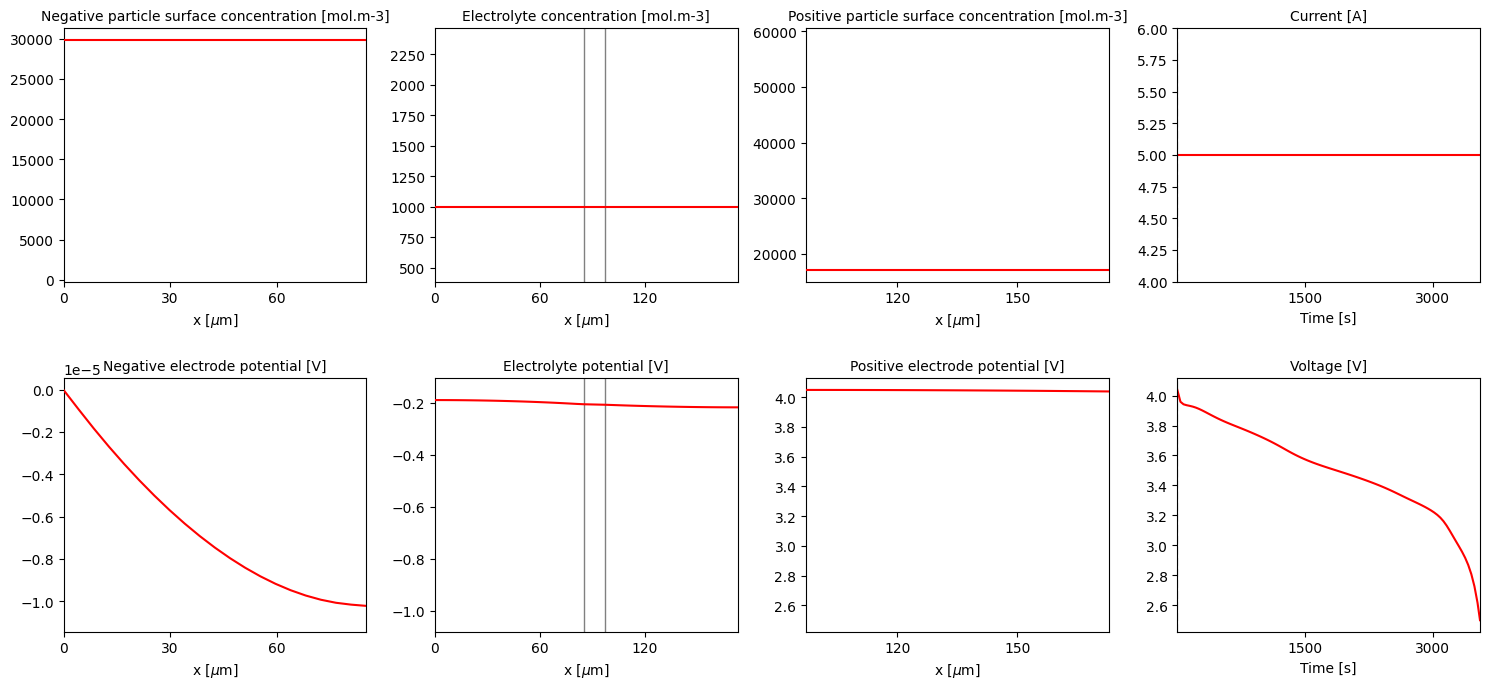

In [10]:
sim.solve([1,3600])
sim.plot()

In [11]:
params["Current function [A]"]

5.0

In [12]:
params["Current function [A]"]=10

interactive(children=(FloatSlider(value=1.0, description='t', max=1704.071802376102, min=1.0, step=17.04071802…

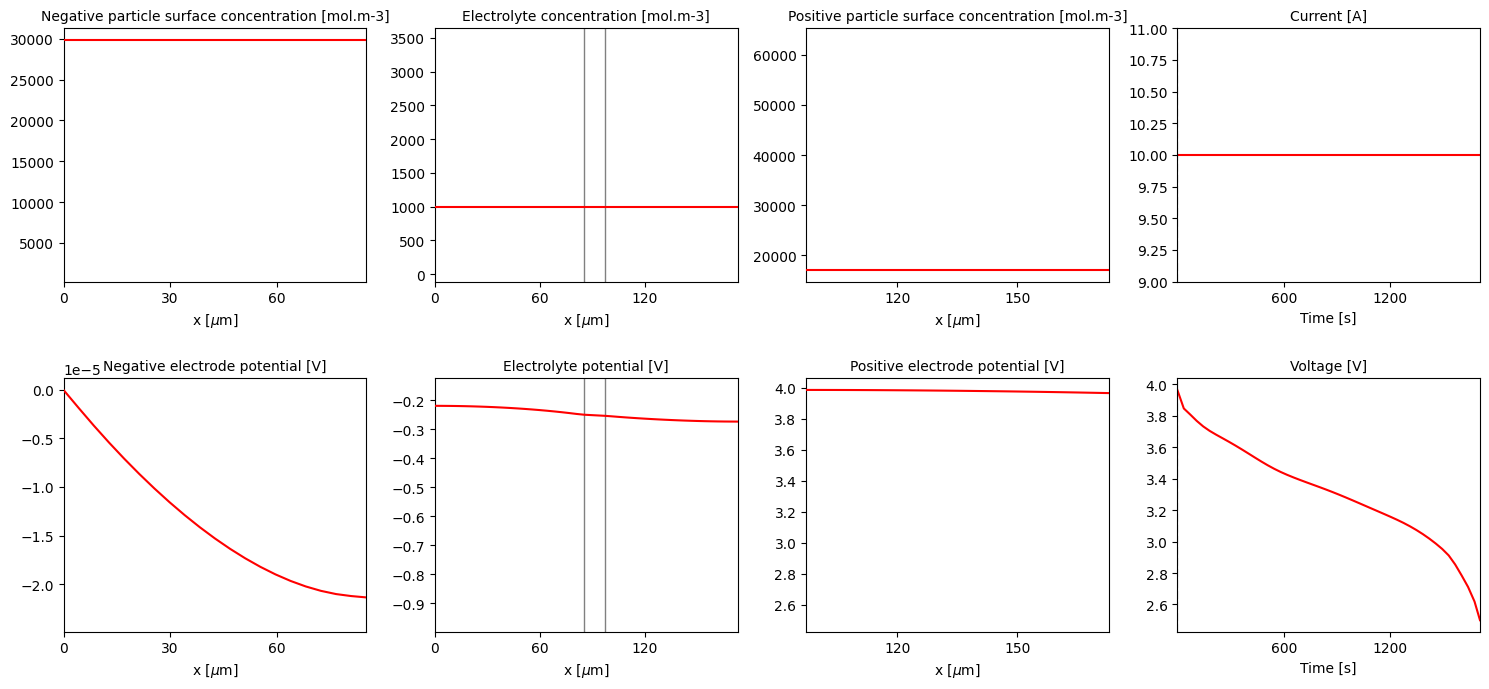

In [13]:
new_sim=pybamm.Simulation(model,parameter_values=params)
new_sim.solve([1,3600])
new_sim.plot()

In [14]:
import matplotlib.pyplot as plt

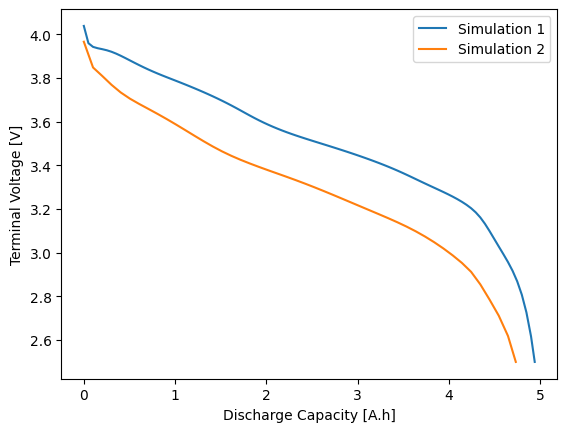

In [15]:
# Create a figure and a set of subplots (axes)
fig, ax = plt.subplots()

# List of simulation solutions to plot
solutions = [sim.solution, new_sim.solution]

# Loop through each solution and plot the discharge capacity vs. terminal voltage
for sol in solutions:
    discharge_capacity = sol["Discharge capacity [A.h]"].data
    V = sol["Terminal voltage [V]"].data
    ax.plot(discharge_capacity, V)

# Set labels and titles for the plot
ax.set_xlabel("Discharge Capacity [A.h]")
ax.set_ylabel("Terminal Voltage [V]")
ax.legend(["Simulation 1", "Simulation 2"])  # Add legend if desired

# Display the plot
plt.show()


In [16]:
import numpy as np
def my_current(t):
  return -0.1*pybamm.sin(2*np.pi*t/60)

In [17]:
params["Current function [A]"]= my_current

interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

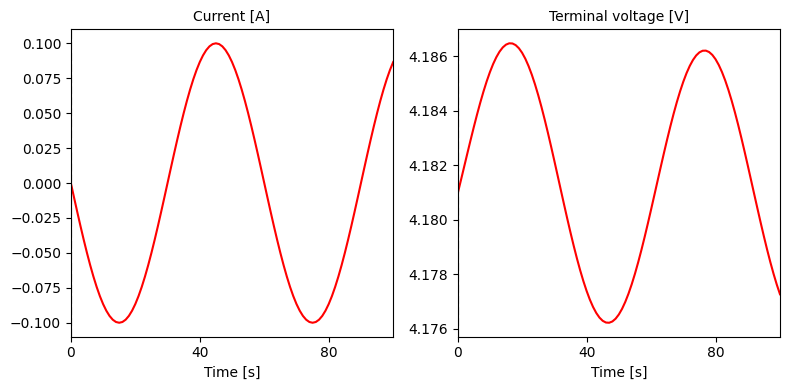

In [19]:


# Create a new Simulation object with the updated parameters
sin_sim = pybamm.Simulation(model, parameter_values=params)

# Define the time points at which to evaluate the solution
t_eval = np.arange(0, 101, 1)

# Solve the simulation at the specified time points
sin_sim.solve(t_eval)

# Plot specific results: Current and Terminal Voltage
sin_sim.plot(["Current [A]", "Terminal voltage [V]"])
